# 회귀분석 - 주택가격 회귀분석

In [4]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

In [3]:
!pip install sklearn  # 머신러닝 패키지

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 7.9 MB 7.7 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=8701010c5806610bf92e04e8e6475dbaa62a7def1bbd5220ee7edd9190865fdf
  Stored in directory: /Users/gueunhye/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [5]:
import numpy as np
import pandas as pd
# 싸이킷 런
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df['PRICE'] = boston.target

In [11]:
boston_df['PRICE'] = boston.target

In [12]:
boston_df.shape

(506, 14)

In [12]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# 사이킷런
# 파이썬으로 머신러닝을 수행하기 위한 쉽고 효율적인 개발 라이브러리
# 보스톤 주택 가격 데이터, 붓꽃 데이터 등과 같은 머신러닝 분석용 데이터 셋.
# 마지막 컬럼은 종속변수 Y, target 배열로 관리

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
Y = boston_df['PRICE']  # 종속변수
X = boston_df.drop(['PRICE'],axis = 1,inplace = False)
X = boston_df.drop(['PRICE'], axis = 1, inplace = False)

In [21]:
#훈련용 데이터와 평가용 데이터 분활하기
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 156)

In [25]:
print(X_train)

         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
49    0.21977   0.0   6.91   0.0  0.4480  5.602   62.0  6.0877   3.0  233.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727   69.5  3.7965   4.0  307.0   
261   0.53412  20.0   3.97   0.0  0.6470  7.520   89.4  2.1398   5.0  264.0   
503   0.06076   0.0  11.93   0.0  0.5730  6.976   91.0  2.1675   1.0  273.0   
72    0.09164   0.0  10.81   0.0  0.4130  6.065    7.8  5.2873   4.0  305.0   
..        ...   ...    ...   ...     ...    ...    ...     ...   ...    ...   
63    0.12650  25.0   5.13   0.0  0.4530  6.762   43.4  7.9809   8.0  284.0   
485   3.67367   0.0  18.10   0.0  0.5830  6.312   51.9  3.9917  24.0  666.0   
418  73.53410   0.0  18.10   0.0  0.6790  5.957  100.0  1.8026  24.0  666.0   
204   0.02009  95.0   2.68   0.0  0.4161  8.034   31.9  5.1180   4.0  224.0   
44    0.12269   0.0   6.91   0.0  0.4480  6.069   40.0  5.7209   3.0  233.0   

     PTRATIO       B  LSTAT  
49      17.9  396.90 

In [15]:
# 선형회귀 분석 모델 생성
lr = LinearRegression()
lr = LinearRegression()

In [29]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)
lr.fit(X_train, Y_train)
# 선형회귀분석 : 평가 데이터에 대한 예측 수행
# X 값을 통해서 Y값을 예측
Y_predict = lr.predict(X_test)
Y_predict

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [ ]:
# 특정 수치에 대한 예측의 정확도를 표현할때 
# 수치가 낮을수록 정확하다고 판단.

In [34]:
mse = mean_squared_error(Y_test,Y_predict)
rmse = np.sqrt(mse)

mse = mean_squared_error(Y_test,Y_predict)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
# 평가용, 예측 오차 확인해보기
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [42]:
print('Y 절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

# y값 예측하기 위해서?

Y 절편 값: 40.99559517216477
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [38]:
coef = pd.Series(data = np.round(lr.coef_,2), index = X.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

# 회귀분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


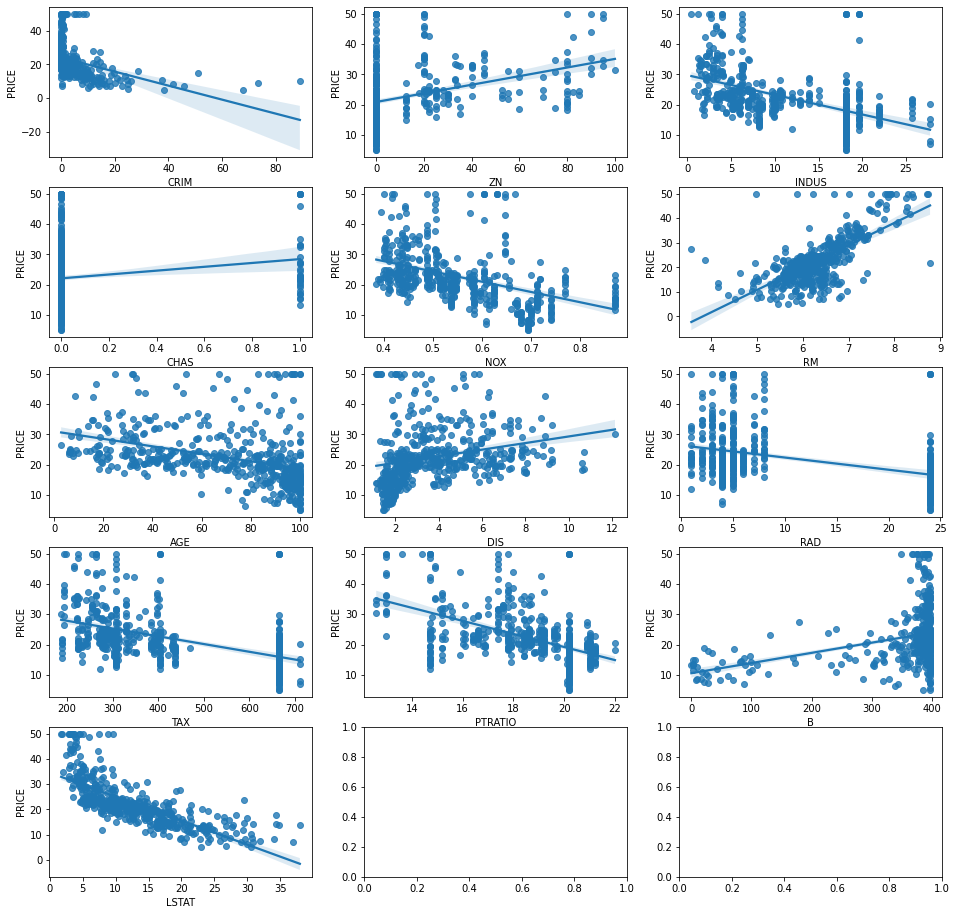

In [48]:
fig , axs = plt.subplots(figsize = (16,16), ncols= 3, nrows = 5)
x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    #regplot -> scatter plot 과 line plot을 함께 볼수있는 시각화 방법.
    sns.regplot(x=feature, y = 'PRICE', data = boston_df, ax = axs[row][col])